In [28]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

np.random.seed(1)


In [29]:
events = uproot.open("D:\\data\\gemtrd\\003200_v7_hists.root")["events"]
events.keys()


['srs_raw_count',
 'srs_raw_roc',
 'srs_raw_slot',
 'srs_raw_channel',
 'srs_raw_apv_id',
 'srs_raw_channel_apv',
 'srs_raw_best_sample',
 'srs_raw_samples_index',
 'srs_raw_samples_count',
 'srs_raw_samples',
 'f125_wraw_count',
 'f125_wraw_roc',
 'f125_wraw_slot',
 'f125_wraw_channel',
 'f125_wraw_invalid_samples',
 'f125_wraw_overflow',
 'f125_wraw_itrigger',
 'f125_wraw_samples_index',
 'f125_wraw_samples_count',
 'f125_wraw_samples',
 'f250_wraw_count',
 'f250_wraw_roc',
 'f250_wraw_slot',
 'f250_wraw_channel',
 'f250_wraw_invalid_samples',
 'f250_wraw_overflow',
 'f250_wraw_itrigger',
 'f250_wraw_samples_index',
 'f250_wraw_samples_count',
 'f250_wraw_samples',
 'f125_pulse_count',
 'f125_pulse_roc',
 'f125_pulse_slot',
 'f125_pulse_channel',
 'f125_pulse_npk',
 'f125_pulse_le_time',
 'f125_pulse_time_quality_bit',
 'f125_pulse_overflow_count',
 'f125_pulse_pedestal',
 'f125_pulse_integral',
 'f125_pulse_peak_amp',
 'f125_pulse_peak_time',
 'f125_pulse_word1',
 'f125_pulse_word2'

In [30]:
entry = 3  # Should be available starting event #3

# This is the number of time snapshots used by SRS data taking
time_bins = events['srs_raw_samples_count'].array(entry_start=entry, entry_stop=entry+1)[0][0]

In [31]:
def get_entry_arrays_as_df(entry_num, names):
    """
    For root data presented as aligned arrays, read such arrays from 1 event and returns in form of data frame
    """
    raw_dict = {}
    for name in names:
        raw_dict[name] = events[name].array(entry_start=entry, entry_stop=entry+1)[0]
    
    return pd.DataFrame(raw_dict)    

In [32]:
get_entry_arrays_as_df(228, ['srs_raw_roc',
                             'srs_raw_slot',
                             'srs_raw_channel',
                             'srs_raw_apv_id',
                             'srs_raw_channel_apv',
                             'srs_raw_best_sample',
                             'srs_raw_samples_index',
                             'srs_raw_samples_count',
                             ])

,srs_raw_roc,srs_raw_slot,srs_raw_channel,srs_raw_apv_id,srs_raw_channel_apv,srs_raw_best_sample,srs_raw_samples_index,srs_raw_samples_count
0,76,24,0,0,0,0,0,6
1,76,24,1,0,1,0,6,6
2,76,24,2,0,2,0,12,6
3,76,24,3,0,3,0,18,6
4,76,24,4,0,4,0,24,6
...,...,...,...,...,...,...,...,...
891,76,24,891,6,123,0,5346,6
892,76,24,892,6,124,0,5352,6
893,76,24,893,6,125,0,5358,6
894,76,24,894,6,126,0,5364,6


In [33]:
entry = 228
srs_idx = events["srs_prerecon_x"].array(entry_start=entry, entry_stop=entry+1)

srs_idx

<Array [[-113, -78.1, -53.8, ..., -77.4, -61.4]] type='1 * var * float64'>

In [34]:
len(srs_idx[0])/6

256.0

In [35]:
srs_idx.type.show()

1 * var * float64


In [36]:
srs_idx.fields

[]

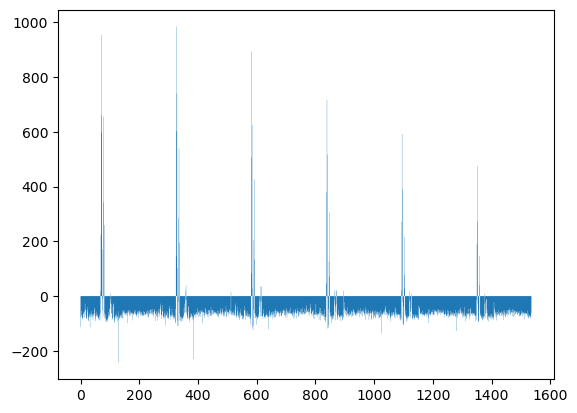

In [37]:

fig, ax = plt.subplots()
plt.stairs(srs_idx[0], fill=True)
#ax.bar(srs_idx[0], edgecolor="black", align="edge")

plt.show()

In [38]:

def plot_peaks_finding(fig, entry, prerecon_name, plane_name):
    num_channels = 256
    bin_centers = np.arange(num_channels)
    full_data_x = events[prerecon_name].array(entry_start=entry, entry_stop=entry+1)[0]
    peaks_df = get_entry_arrays_as_df(entry,[
                                         'gem_peak_plane_name',
                                         'gem_peak_index',
                                         'gem_peak_height',
                                         'gem_peak_width'])

    # PLOT raw data
    # go over time bins
    for time_bin in range(time_bins):
        ch_data = []
        # get channels for this time slot
        for channel_i in range(num_channels):
            full_idx = time_bin*num_channels + channel_i
            ch_data.append(full_data_x[full_idx])

        fig.add_bar(name=f'time_bin {time_bin}', x=bin_centers, y=ch_data)

    fig.update_layout(barmode='overlay')
    x_df = peaks_df[peaks_df['gem_peak_plane_name'] == plane_name].reset_index()

    for index, row in x_df.iterrows():
        fig.add_trace(
            go.Bar(
                x=[row['gem_peak_index']],
                y=[row['gem_peak_height']],
                width=[row['gem_peak_width']],  # Here's where we set the width of the bar
                name=f"peak {index}",
                opacity=0.4
            )
        )

    fig_r.update_layout(        
        xaxis_title="channel",
        title=f"Plane: {plane_name}"
    )



In [46]:
entry = 599
# Create an empty figure
fig_r = go.Figure()

plot_peaks_finding(fig_r, entry, "srs_prerecon_x", 'URWELLX')

fig_r.update_layout(autosize=False, width=1000, height=500)


fig_r.show()

In [57]:
entry = 645
# Create an empty figure
fig_l = go.Figure()

plot_peaks_finding(fig_l, entry, "srs_prerecon_y", 'URWELLY')
fig_l.update_layout(autosize=False, width=1000, height=500)
#fig_l.update_layout(showlegend=False)
fig_l.show()

In [41]:
def read_as_df( entry_num):
    
    peak_count = events['gem_peak_count'].array(entry_start=entry, entry_stop=entry+1)
    peak_plane_id = events['gem_peak_plane_id'].array(entry_start=entry, entry_stop=entry+1)[0]
    peak_plane_name = events['gem_peak_plane_name'].array(entry_start=entry, entry_stop=entry+1)[0]
    peak_index = events['gem_peak_index'].array(entry_start=entry, entry_stop=entry+1)[0]
    peak_apv_id = events['gem_peak_apv_id'].array(entry_start=entry, entry_stop=entry+1)[0]
    peak_height = events['gem_peak_height'].array(entry_start=entry, entry_stop=entry+1)[0]
    peak_width = events['gem_peak_width'].array(entry_start=entry, entry_stop=entry+1)[0]
    peak_area = events['gem_peak_area'].array(entry_start=entry, entry_stop=entry+1)[0]
    peak_real_pos = events['gem_peak_real_pos'].array(entry_start=entry, entry_stop=entry+1)[0]

In [42]:
import ipywidgets
fig_l.update_layout(showlegend=False)
fig_r.update_layout(showlegend=False)
ipywidgets.HBox(
    [go.FigureWidget(fig_l, layout={"width":400, "height":800}), go.FigureWidget(fig_r, layout={"width":400,"height":800})],
)

    'data': [{'name': 'time_bin 0',
              'type': 'bar',
              '…

In [43]:
peks_df

NameError: name 'peks_df' is not defined

In [ ]:
peak_plane_name[0]

In [ ]:
for i in range(peak_count[0]):
    if peak_plane_name[i] != "URWELLY":
        continue
        
    print(f"{peak_index[i]} {peak_height[i]}")
    
    
    

In [ ]:
peak_plane_id[0]